# Выпускной проект: анализ оттока клиентов банка ##

**Материалы**

https://disk.yandex.ru/i/0Bj9yx3ogHGy5w

**Цель проекта**

Выявить сегменты клиентов, которые склонны уходить из банка

**Задача проекта**

Анализ клиентов регионального банка 

**Описание данных**

Файл /datasets/bank_scrooge.csv

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.
Колонки:

**USERID** — идентификатор пользователя

**score** — баллы кредитного скоринга

**city** — город

**gender** — пол

**age** — возраст

**equity** — количество баллов собственности

**balance** — баланс на счёте

**products** — количество продуктов, которыми пользуется клиент

**credit_card** — есть ли кредитная карта

**last_activity** — активный клиент

**EST_SALARY** — оценочный доход клиента

**сhurn** — признак оттока

**Декомпозиция проекта**:

1. Загрузка данных и импорт необходимых библиотек

2. Предобработка данных:

     2.1 проверка и приведение к корректному типу данных
     
     2.2 приведение к "змеиному" регистру названий столбцов
     
     2.3 проверка на наличие пропусков
     
     2.4 проверка на наличие дубликатов
     
     2.5 проверка значений на наличие выбросов
     
3. Исследовательский анализ данных:

     3.1 определить интервалы значений характеристик, соответствующих наиболее высокому оттоку
     
     3.2 сравнение ушедших и оставшихся клиентов по каждому признаку
     
     3.3 выделение сегиентов клиентов по высокоотточным группам и определение оттока в этих сегментах

4. Статистический анализ данных:

     4.1 выдвижение гипотезы о различии дохода между ушедшими и оставшимися клиентами и ее проверка
     
     4.2 выдвижение гипотезы о различии баланса между ушедшими и оставшимися клиентами и ее проверка

5. Итоговый вывод

# 1.Загрузка данных и импорт необходимых библиотек ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [3]:
data.head(20)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


# 2.Предобработка данных ##

**2.1 Проверка и приведение к корректному типу данных**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Тип данных в столбцах адекватен содержанию

**2.2 Приведение к "змеиному" регистру названий столбцов**

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


Названия столбцов приведены к "змеиному" регистру

**2.3 Проверка на наличие пропусков**

In [7]:
data.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Обнаружены клиенты, у которых количество продуктов равно 0. 

In [8]:
data[data['products']==0]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


Удалим данную строку

In [9]:
data = data[data['products'].notna()]
data.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


In [10]:
temp = data.copy()          
missing = (pd.DataFrame({'Кол-во пропусков': temp.isnull().sum(), 'Доля пропусков': temp.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
missing

,Кол-во пропусков,Доля пропусков
userid,0,0.000000
score,0,0.000000
city,0,0.000000
gender,0,0.000000
age,26,0.002600
equity,0,0.000000
balance,2295,0.229500
products,0,0.000000
credit_card,0,0.000000
last_activity,0,0.000000


In [11]:
display (data[data['age'].isna()])

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


Количество пропусков в столбце возраста крайне мало. Считаю, что можно удать данные строки.

In [12]:
data = data[data['age'].notna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   float64
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1013.0+ KB


Пропусков в столбце баланса очень много (23% от всех данных). Оставим как есть.

**2.4 Проверка на наличие дубликатов**

In [13]:
data.duplicated().sum()

0

Полные дубликаты в датасете отсутствуют

In [14]:
data.duplicated(subset=['userid']).sum()

50

In [15]:
data.loc[data.duplicated(subset=['userid'], keep = False)]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
58,164676,860.0,Ярославль,М,37.0,5,648594.03,2,1,1,213586.86,1
150,185748,850.0,Рыбинск,М,36.0,5,1203376.67,2,0,1,89401.82,1
161,197364,928.0,Рыбинск,Ж,53.0,6,1347183.86,2,0,1,168189.49,1
231,190253,823.0,Рыбинск,М,37.0,4,373348.39,2,0,1,131947.92,1
690,152479,768.0,Рыбинск,Ж,42.0,0,126787.79,4,1,1,143233.23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9659,195884,767.0,Рыбинск,Ж,45.0,1,335652.56,3,1,1,100197.67,0
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
9785,168998,895.0,Рыбинск,М,44.0,0,282653.53,3,0,0,255296.47,0
9880,217412,886.0,Ярославль,Ж,35.0,3,1026172.14,2,1,0,53099.16,0


In [16]:
data.duplicated(subset=['userid', 'age', 'city']).sum()

0

In [17]:
data.loc[data['userid'] == 164676]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
58,164676,860.0,Ярославль,М,37.0,5,648594.03,2,1,1,213586.86,1
7271,164676,790.0,Рыбинск,Ж,77.0,1,111202.01,1,1,0,32835.45,0


In [18]:
data.loc[data['userid'] == 185748]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
150,185748,850.0,Рыбинск,М,36.0,5,1203376.67,2,0,1,89401.82,1
3106,185748,912.0,Ярославль,Ж,47.0,5,1598218.98,2,0,0,180256.98,0


In [19]:
data.loc[data['userid'] == 195884]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2226,195884,906.0,Ярославль,М,49.0,6,1354552.83,2,0,0,270678.42,1
9659,195884,767.0,Рыбинск,Ж,45.0,1,335652.56,3,1,1,100197.67,0


Посмотрев несколько дублей по идентификатору пользователя понятно, что они получились из-за слияния баз данных Ярославля и Рыбинска и имеют различные данные в остальных столбцах. Считаю возможным их оставить.

**2.5 Проверка значений на наличие выбросов**

In [20]:
data.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9974.000000,9974.000000,9974.000000,9974.000000,7.695000e+03,9974.000000,9974.000000,9974.000000,9.974000e+03,9974.000000
mean,171755.218669,848.682575,42.734409,2.630840,8.272456e+05,1.871466,0.680168,0.522859,1.477868e+05,0.182374
std,33695.527126,65.399720,12.179971,1.979965,1.980327e+06,0.792729,0.466435,0.499502,1.392855e+05,0.386172
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142760.000000,802.000000,33.000000,0.000000,2.956987e+05,1.000000,0.000000,0.000000,7.525166e+04,0.000000
50%,172643.000000,853.000000,40.000000,3.000000,5.242953e+05,2.000000,1.000000,1.000000,1.196268e+05,0.000000
75%,201163.750000,900.000000,51.000000,4.000000,9.800512e+05,2.000000,1.000000,1.000000,1.744998e+05,0.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Выбросов значений не обнаружила

# 3.Исследовательский анализ данных ##

**3.1 Определение интервалов значений характеристик, соответствующих наиболее высокому оттоку**

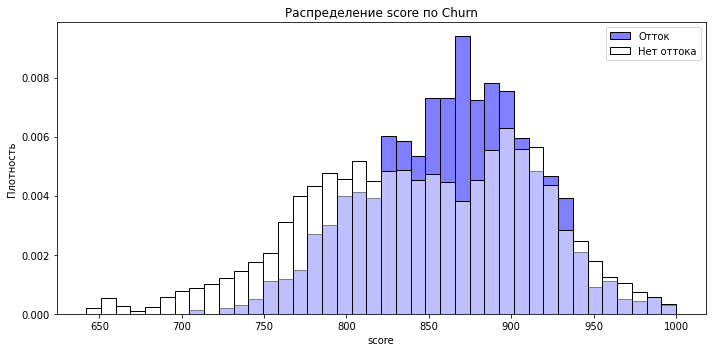

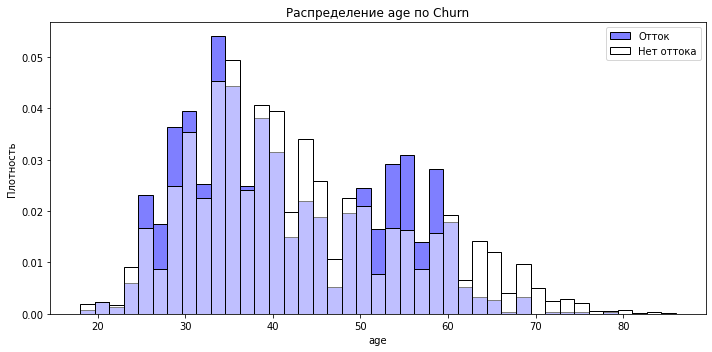

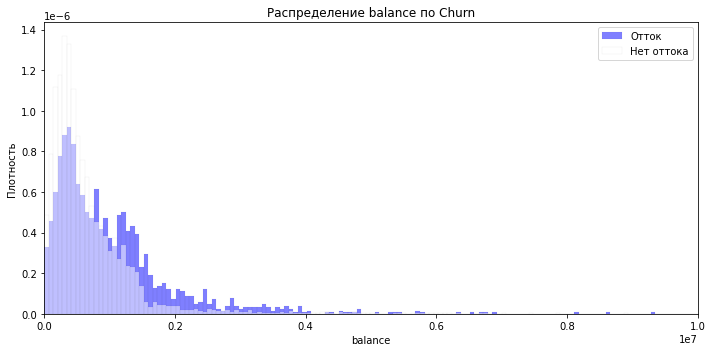

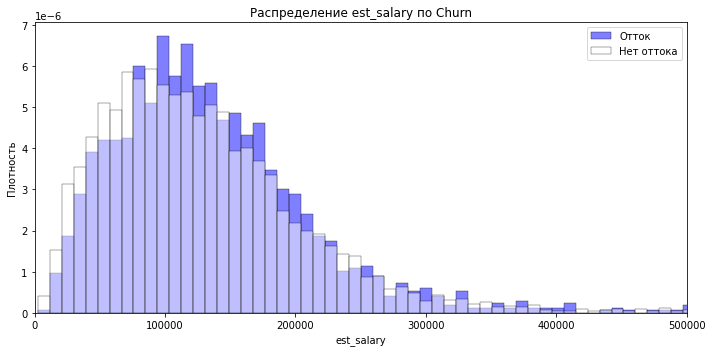

In [21]:
cont_index = ['score', 'age', 'balance', 'est_salary']

for index in cont_index:
    plt.figure(figsize=(10, 5))
    sns.histplot(data, x=index, hue="churn", stat="density", common_norm=False, palette="flag")
    plt.title(f'Распределение {index} по Churn')
    plt.legend(['Отток', 'Нет оттока'])
    plt.ylabel('Плотность')
    
    if index == 'balance':
        plt.xlim(0, 10000000)
    elif index == 'est_salary':
        plt.xlim(0, 500000)
        
    plt.tight_layout()
    plt.show()

По баллам кредитного скоринга максимальный отток в диапазоне от 850 до 900 баллов.

По возрасту максимальный отток с 28 до 35 лет.

Максимальный отток наблюдается у клиентов с балансом от 0,8 до 1,5 млн.

Максимальный отток среди клиентов с оценочным доходом от 100 000 до 120 000.

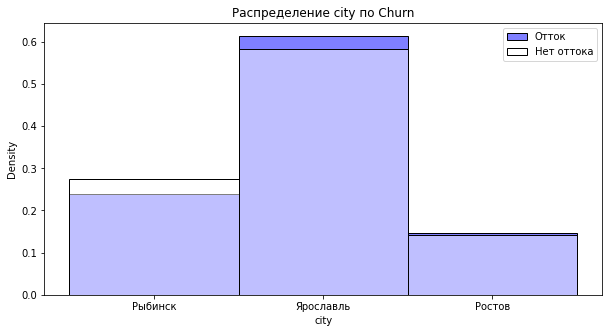

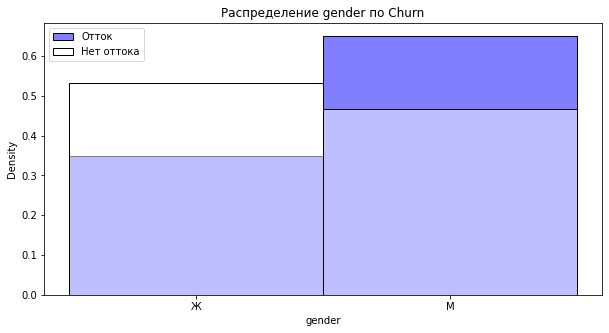

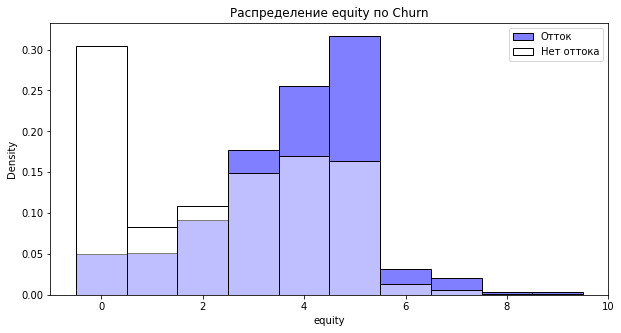

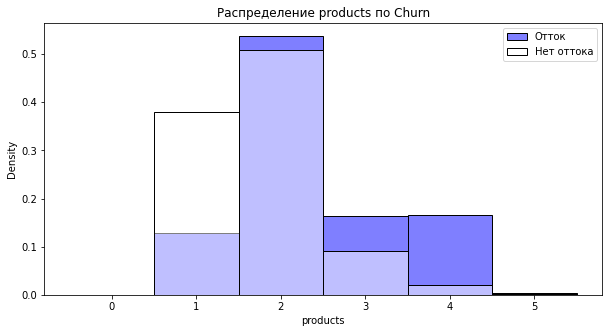

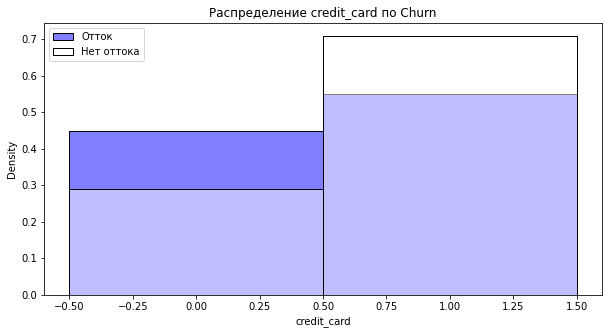

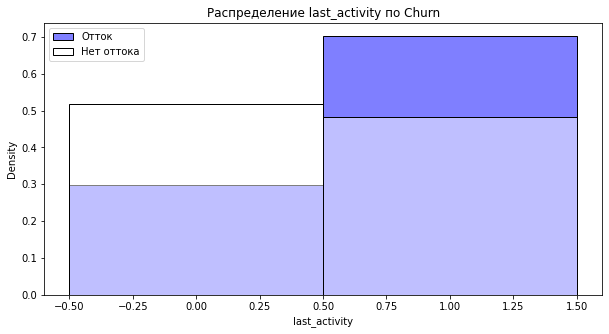

In [22]:
cat_index = ['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity']

for index in cat_index:
    plt.figure(figsize=(10, 5))
    sns.histplot(data, x=index, hue="churn", stat="density", common_norm=False, palette="flag", discrete=True)
    plt.title(f'Распределение {index} по Churn')
    plt.legend(['Отток', 'Нет оттока'])
    
    
    plt.show()

Выше всего отток клиентов в Ярославле.

Мужчины чаще покидают банк.

Чаще уходят клиенты с баллами собственности 4-5.

Чаще покидают банк клиенты, имеющие 2 банковских продукта, не имеющие кредитную карту, и имеющие статус "активный клиент".



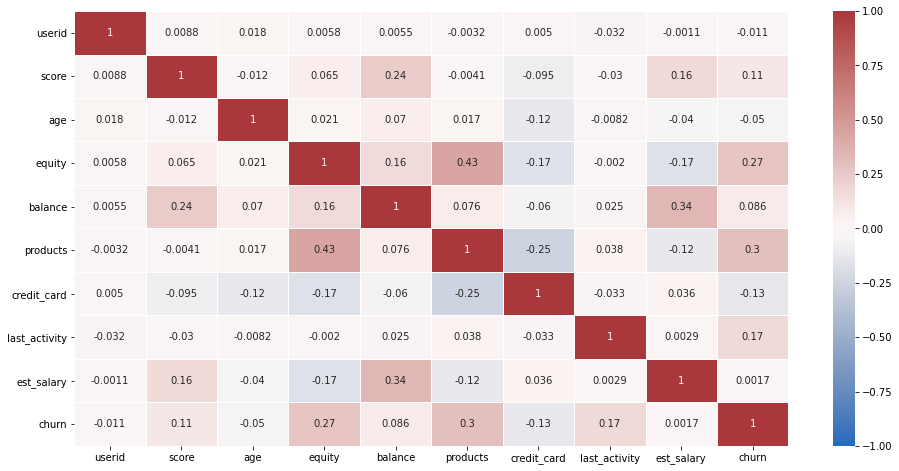

In [23]:
plt.figure(figsize=(16,8))
sns.heatmap (data.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'vlag', linewidths=1);

Наблюдается умеренная зависимость между количеством баллов собственности и количеством банковских продуктов, между балансом клиента и оценочным доходом, между показателем оттока и количеством банковских продуктов. 

In [24]:
data_corr = data.corr()

<AxesSubplot:>

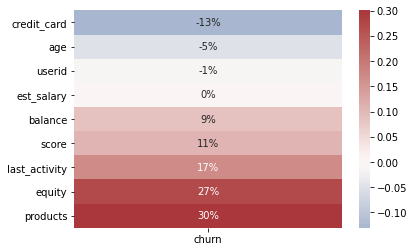

In [25]:
sns.heatmap(data_corr.loc[:,['churn']].drop('churn').sort_values('churn'), annot=True, fmt=".0%", cmap="vlag", center=0)

Выше всего корреляция с признаком оттока у банковских продуктов, баллов собственности и признака "активный клиент". Низкая отрицательная корреляция с признаком оттока у показателя наличия кредитной карты и возраста.

**3.2 Сравнение ушедших и оставшихся клиентов по каждому признаку**

**3.2.1 Баллы кредитного скоринга.** Максимальный отток клиентов, имеющих баллы в диапазоне от 850 до 900 баллов. Максимум оставшихся клиентов с баллами от 770 до 820 и еще пик в районе 920-930 баллов

**3.2.2 Возраст.** Максимальный отток с 28 до 35 лет. Максимум оставшихся клиентов в возрасте от 35 до 45 лет

**3.2.3 Баланс.** Максимальный отток наблюдается у клиентов с балансом от 0,8 до 1,5 млн. Наибольшее число оставшихся клиентов с балансом от 0,3 до 0,5 млн.

**3.2.4 Оценочный доход.** Максимальный отток среди клиентов с оценочным доходом от 100 000 до 120 000. Оценочный доход большинства оставшихся клиентов в диапазоне от 60 000 до 100 000.

**3.2.5 Город.** Выше всего отток клиентов в Ярославле. Больше оставшихся клиентов в Рыбинске

**3.2.6 Пол.** Мужчины чаще покидают банк, остается больше женщин.

**3.2.7 Баллы собственности.** Чаще уходят клиенты с баллами собственности 4-5, большинство оставшихся с нулевым баллом собсвенности.

**3.2.8 Банковские продукты.** Чаще покидают банк клиенты, имеющие 2 банковских продукта. Остаются больше клиентов с 1 банковским продуктом.

**3.2.9 Кредитная карта.** Чаще покидают банк клиенты, не имеющие кредитную карту, соответственно больше остается клиентов с кредитной картой.

**3.2.10 Активный клиент.** Чаще покидают банк клиенты, имеющие статус "активный клиент". Реже -"неактивные" клиенты.


**3.3 Выделение сегментов клиентов по высокоотточным группам и определение оттока в этих сегментах**

**Сегмент 1**

In [26]:
display(data.query ('850 <= score<= 900 and credit_card==0').agg({'churn':['mean','count']}))

,churn
mean,0.347249
count,1054.000000


Баллы кредитного скоринга: 850 - 900

Наличие кредитной карты: нет

Количество клиентов: 1054

Уровень отточности: 35%

**Сегмент 2**

In [27]:
display(data.query ('4<=equity<=5 and credit_card==0').agg({'churn':['mean','count']}))

,churn
mean,0.35346
count,1474.00000


Баллы собственности: 4 - 5

Наличие кредитной карты: нет

Количество клиентов: 1474

Уровень отточности: 35%

**Сегмент 3**

In [28]:
display(data.query ('28 <= age <= 35 and 800000 <=balance<=1500000').agg({'churn':['mean','count']}))

,churn
mean,0.407792
count,385.000000


Возраст: 28-35 лет

Баланс: от 850 000 до 1 500 000

Количество клиентов: 385

Уровень отточности: 41%

**Сегмент 4**

In [29]:
display(data.query ('28 <= age <= 35 and last_activity==1').agg({'churn':['mean','count']}))

,churn
mean,0.309593
count,1376.000000


Возраст: 28-35 лет

Активность: активен

Количество клиентов: 1376

Уровень отточности: 31%

**Сегмент 5**

In [30]:
display(data.query ('products ==2 and last_activity==1').agg({'churn':['mean','count']}))

,churn
mean,0.276999
count,2639.000000


Банковские продукты: 2

Активность: активен

Количество клиентов: 2639

Уровень отточности: 28%

**Сегмент 6**

In [31]:
display(data.query ('4<=equity<=5 and 100000<=est_salary<=120000').agg({'churn':['mean','count']}))

,churn
mean,0.28436
count,422.00000


Баллы собственности: 4-5

Оценочный доход: 100 000 - 120 000

Количество клиентов: 422

Уровень отточности: 28%

Сегментация показала, что наиболее высокоотточные сегменты - это активные молодые люди в возрасте 28-35.

Рекомендация: предложить этой группе клиентов выгодный кредит, интересные сопутствующие банковские услуги.

Также особенно заметно, что в любых комбинациях высокоотточная граппа - это клиенты, не имеющие кредитной карты.

Рекомендация: предложить и заинтересовать в использовании кредитную карту.

# 4. Статистический анализ данных ##

**4.1 Выдвижение гипотезы о различии дохода между ушедшими и оставшимися клиентами и ее проверка**

Сформулируем нулевую и альтернативную гипотезы.

H₀: доходы оставшихся и отточных клиентов равны

H₁: доходы оставшихся и отточных клиентов не равны

In [32]:
results = st.ttest_ind (
    data[data['churn']==0]['est_salary'],
    data[data['churn']==1]['est_salary'])

alpha = 0.05

print (results.pvalue) 

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

0.8647861589211189
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергнута, следовательно можно предположить, что доходы оставшихся и отточных клиентов равны при alpha = 0.05.

**4.2 Выдвижение гипотезы о различии баланса между ушедшими и оставшимися клиентами и ее проверка**

Для проверки гипотез удалим пропуски в столбце баланса

In [33]:
data_1 = data[data['balance'].notna()]
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7695 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         7695 non-null   int64  
 1   score          7695 non-null   float64
 2   city           7695 non-null   object 
 3   gender         7695 non-null   object 
 4   age            7695 non-null   float64
 5   equity         7695 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       7695 non-null   int64  
 8   credit_card    7695 non-null   int64  
 9   last_activity  7695 non-null   int64  
 10  est_salary     7695 non-null   float64
 11  churn          7695 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 781.5+ KB


Сформулируем нулевую и альтернативную гипотезы.

H₀: баланс оставшихся и отточных клиентов равен

H₁: баланс оставшихся и отточных клиентов не равен

In [34]:
results = st.ttest_ind (
    data_1[data_1['churn']==0]['balance'],
    data_1[data_1['churn']==1]['balance'])

alpha = 0.05

print (results.pvalue) 

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

4.3764190272075795e-14
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, следовательно можно предположить, что балансы оставшихся и отточных клиентов различаются при alpha = 0.05.

# 5.Итоговый вывод ##

В рамках проведенного анализа были выявлены группы высокоотточных клиентов по всем заявленным параметрам.

**Баллы кредитного скоринга.** Максимальный отток клиентов, имеющих баллы в диапазоне от 850 до 900 баллов.

**Возраст.** Максимальный отток с 28 до 35 лет.

**Баланс.** Максимальный отток наблюдается у клиентов с балансом от 0,8 до 1,5 млн.

**Оценочный доход.** Максимальный отток среди клиентов с оценочным доходом от 100 000 до 120 000.

**Город.** Выше всего отток клиентов в Ярославле. 

**Пол.** Мужчины чаще покидают банк.

**Баллы собственности.** Чаще уходят клиенты с баллами собственности 4-5.

**Банковские продукты.** Чаще покидают банк клиенты, имеющие 2 банковских продукта.

**Кредитная карта.** Чаще покидают банк клиенты, не имеющие кредитной карты.

**Активный клиент.** Чаще покидают банк клиенты, имеющие статус "активный клиент".



По этим же параметрам сформированы группы максимально оставшихся клиентов.

**Баллы кредитного скоринга.** Максимум оставшихся клиентов с баллами от 770 до 820 и еще пик в районе 920-930 баллов

**Возраст.** Максимум оставшихся клиентов в возрасте от 35 до 45 лет.

**Баланс.** Наибольшее число оставшихся клиентов с балансом от 0,3 до 0,5 млн.

**Оценочный доход.** Оценочный доход большинства оставшихся клиентов в диапазоне от 60 000 до 100 000.

**Город.** Больше оставшихся клиентов в Рыбинске

**Пол.** Остается больше женщин.

**Баллы собственности.** Большинство оставшихся с нулевым баллом собсвенности.

**Банковские продукты.** Остаются больше клиентов с 1 банковским продуктом.

**Кредитная карта.** Больше остается клиентов с кредитной картой.

**Активный клиент.** Редко покидают банк "неактивные" клиенты.


Проведенная в рамках анализа сегментация по высокоотточным группам параметров показала, что наиболее высокоотточные сегменты - это активные молодые люди в возрасте 28-35.

Рекомендация: предложить этой группе клиентов выгодный кредит, интересные сопутствующие банковские услуги.

Также особенно заметно, что в любых комбинациях высокоотточная граппа - это клиенты, не имеющие кредитной карты.

Рекомендация: предложить и заинтересовать в использовании кредитной карты.

Проведен статистический анализ следующих гипотез:
Гипотеза о различии доходов оставшихся и отточных клиентов: не подтвердилась
Гипотеза о различии баланса отточных и оставшихся клиентов: подтвердилась
